# Assignment 25-feb-2023 Pandas-3

In [2]:
import pandas as pd

course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

---
Q1. Write a code to print the data present in the second row of the dataframe, df.

In [10]:
df.iloc[1]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

---
Q2. What is the difference between the functions loc and iloc in pandas.DataFrame?

**loc**:
- selects data from dataframe with the label indexing.
- It takes row label and column label.
- `df[row_label, col_label]`
- Example: `df[1, course_name]`


**iloc**:
- selects the data with integer based indexing.
- It takes row index and column index.
- `df[row_index, col_index]`
- Example: `df[1, 0]`


---
Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df then find the output for both new_df.loc[2] and new_df.iloc[2].

In [15]:
reindex = [3,0,1,2]

new_df = df.reindex(reindex)

new_df

,course_name,duration
3,Data Engineer,4
0,Data Science,2
1,Machine Learning,3
2,Big Data,6


In [13]:
new_df.loc[2]

course_name    Big Data
duration              6
Name: 2, dtype: object

In [14]:
new_df.iloc[2]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

Difference in both the outputs?

Yes, there is a difference between the two outputs the first one `loc` outputting `Big Data` while the second one `iloc` outputting `Machine Learning`.

The differnce between the outputs is obvious as `loc` selects the item with label = 2 that's big data and the `iloc` selects based on the index = 2 which is machine learning.

---

In [18]:
import numpy as np

columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]

df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

In [19]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.593015,0.110438,0.298630,0.980142,0.309755,0.991312
2,0.336648,0.503374,0.798184,0.445294,0.937357,0.452321
3,0.648803,0.129577,0.977591,0.781737,0.100871,0.103620
4,0.188844,0.292689,0.732309,0.158412,0.854007,0.549719
5,0.734027,0.556569,0.037849,0.679546,0.819451,0.416970
6,0.560457,0.137172,0.462870,0.982058,0.720712,0.050967


---
Q4. Write a code to find the following statistical measurements for the above dataframe df1:

1. mean of each and every column present in the dataframe.
1. standard deviation of column, ‘column_2’

In [20]:
df1.mean()

column_1    0.510299
column_2    0.288303
column_3    0.551239
column_4    0.671198
column_5    0.623692
column_6    0.427485
dtype: float64

In [21]:
df1.std()

column_1    0.205953
column_2    0.198953
column_3    0.349495
column_4    0.321979
column_5    0.337954
column_6    0.340654
dtype: float64

---
Q5. Replace the data present in the second row of column_1, ‘column_2’ by a string variable then find the mean of column_1, column_2.

If you are getting errors in executing it then explain why.

[Hint: To replace the data use df1.loc[] and equate this to string data of your choice.]

In [52]:
df1.loc[2:2,['column_1','column_2']] = 'new_value'

In [54]:
df1[['column_1', 'column_2']].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

The error `TypeError: unsupported operand type(s) for +: 'float' and 'str'` above as self explainatory that we can't find the mean of the string values.

---
Q6. What do you understand about the windows function in pandas and list the types of windows
functions?

In pandas window function (also known as rolling function or rolling window function or moving function) is a function that operates over a specified window of datapoints in a dataframe.

Few functions which can be used over it are as:

rolling().mean()
rolling().std()
rolling().sum()
rolling().apply()

Example:
```py
# Create a DataFrame
data = {'Value': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)

# Calculate rolling window mean with window size 3
df['Rolling Mean'] = df['Value'].rolling(window=3).mean()

print(df)
```


---
Q7. Write a code to print only the current month and year at the time of answering this question.
[Hint: Use pandas.datetime function]

In [72]:
str(pd.Timestamp.now())[:7]

'2023-08'

---
Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and
calculates the difference between them in days, hours, and minutes using Pandas time delta. The
program should prompt the user to enter the dates and display the result.

In [84]:
date1 = input('Date 1') # '2001-10-01'
date2 = input('Date 2') # '2001-11-11'

pd.to_datetime(date2) - pd.to_datetime(date1)

Timedelta('41 days 00:00:00')

---
Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified column to a categorical data type. The program should prompt the user to enter the file path, column name, and category order, and then display the sorted data.

In [110]:
file_path = input('file_path') # ./test/categorical.csv
column_name = input('column_name') # Category
category = input('category').split(',') # Green,Red,Blue

cat_df = pd.read_csv(file_path)
cat_col = pd.Categorical(
    cat_df[column_name],
    categories=[category],
    ordered=True
)

cat_df[column_name] = cat_col

sorted_df = cat_df.sort_values(by=column_name)

sorted_df

,Name,Category
1,Bob,Green
4,Eve,Green
7,Helen,Green
0,Alice,Red
3,David,Red
6,Grace,Red
2,Charlie,Blue
5,Frank,Blue
8,Isaac,Blue


---
Q10. Write a Python program that reads a CSV file containing sales data for different products and visualizes the data using a stacked bar chart to show the sales of each product category over time. The program should prompt the user to enter the file path and display the chart.

Text(0.5, 1.0, 'Sales Data by Category over Time')

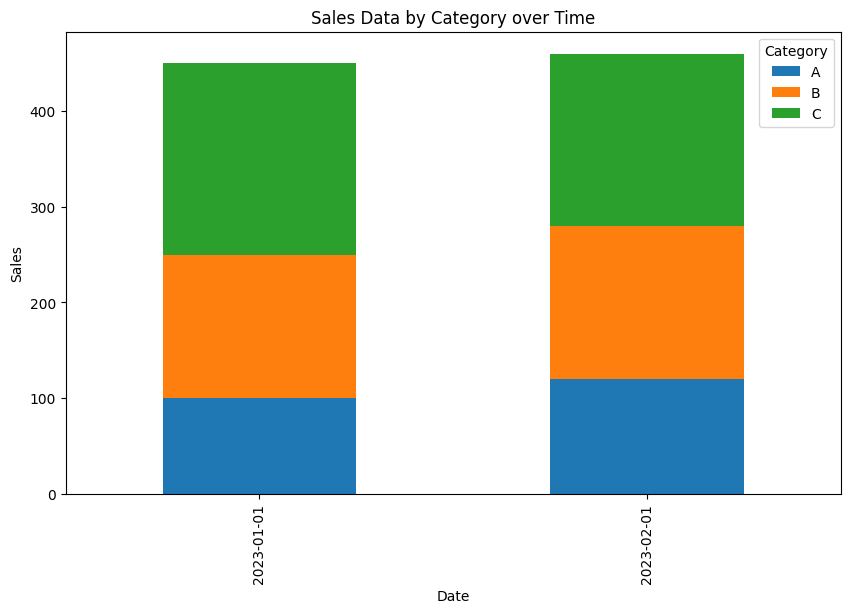

In [120]:
import matplotlib.pyplot as plt

file_path = input('Enter file path: ') # './test/sales_data.csv'

df = pd.read_csv(file_path)

pivot_df = df.pivot(index='Date', columns='Category', values='Sales')

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data by Category over Time')

---
Q11. You are given a CSV file containing student data that includes the student ID and their test score. Write a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, and displays the results in a table.

In [170]:
student_scores_file_path = './test/scores.csv'

df_stu = pd.read_csv(student_scores_file_path) # input("Enter file path: ")

df_3m = pd.DataFrame({
    "Statistic": ['Mean', 'median', 'mode'],
    "Values": [
        df_stu['TestScore'].mean(),
        df_stu['TestScore'].median(),
        tuple(df_stu['TestScore'].mode()),
    ]
})

df_3m


,Statistic,Values
0,Mean,83.0
1,median,85.0
2,mode,"(78, 85, 92)"
